## 1. Correlación V de Cramer

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency

In [38]:
df = pd.read_csv("C:/Users/sofia/Downloads/Repositorios analítica/analítica/proyecto2/Datos/Datos2011Limipios.csv")

In [40]:
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))    
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))

In [41]:
target_col = 'resultado'
non_relevant = ['desemp_ingles', 'punt_ingles']
categorical_cols = [col for col in df.columns if (col != target_col and col not in non_relevant)]

correlations = {}
for col in categorical_cols:
    correlations[col] = cramers_v(df[col], df[target_col])

C:\Users\sofia\AppData\Local\Temp\ipykernel_11864\3426290580.py:10: RuntimeWarning: invalid value encountered in scalar divide
  return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))
C:\Users\sofia\AppData\Local\Temp\ipykernel_11864\3426290580.py:10: RuntimeWarning: invalid value encountered in scalar divide
  return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))


In [42]:
corr_df = pd.DataFrame.from_dict(correlations, orient='index', columns=['Cramer\'s V']).sort_values(by="Cramer's V", ascending=False)

print("\nCorrelaciones Cramer's V con la variable target:\n")
print(corr_df)


Correlaciones Cramer's V con la variable target:

                         Cramer's V
fami_estratovivienda       0.478602
cole_calendario            0.392750
fami_educacionpadre        0.366788
fami_educacionmadre        0.344232
periodo                    0.283766
cole_bilingue              0.282663
cole_naturaleza            0.254090
cole_jornada               0.244417
cole_depto_ubicacion       0.224170
cole_mcpio_ubicacion       0.204707
fami_tieneinternet         0.199769
estu_mcpio_presentacion    0.195236
estu_mcpio_reside          0.177810
fami_tienecomputador       0.168586
estu_depto_reside          0.133646
estu_depto_presentacion    0.131896
cole_genero                0.130672
cole_caracter              0.128784
estu_tipodocumento         0.061873
estu_genero                0.028395
cole_sede_principal        0.022151
estu_pais_reside           0.008211
estu_nacionalidad          0.008211
cole_area_ubicacion        0.000000
estu_estudiante                 NaN
estu_privado_

In [43]:
corr_df

,Cramer's V
fami_estratovivienda,0.478602
cole_calendario,0.392750
fami_educacionpadre,0.366788
fami_educacionmadre,0.344232
periodo,0.283766
cole_bilingue,0.282663
cole_naturaleza,0.254090
cole_jornada,0.244417
cole_depto_ubicacion,0.224170
cole_mcpio_ubicacion,0.204707


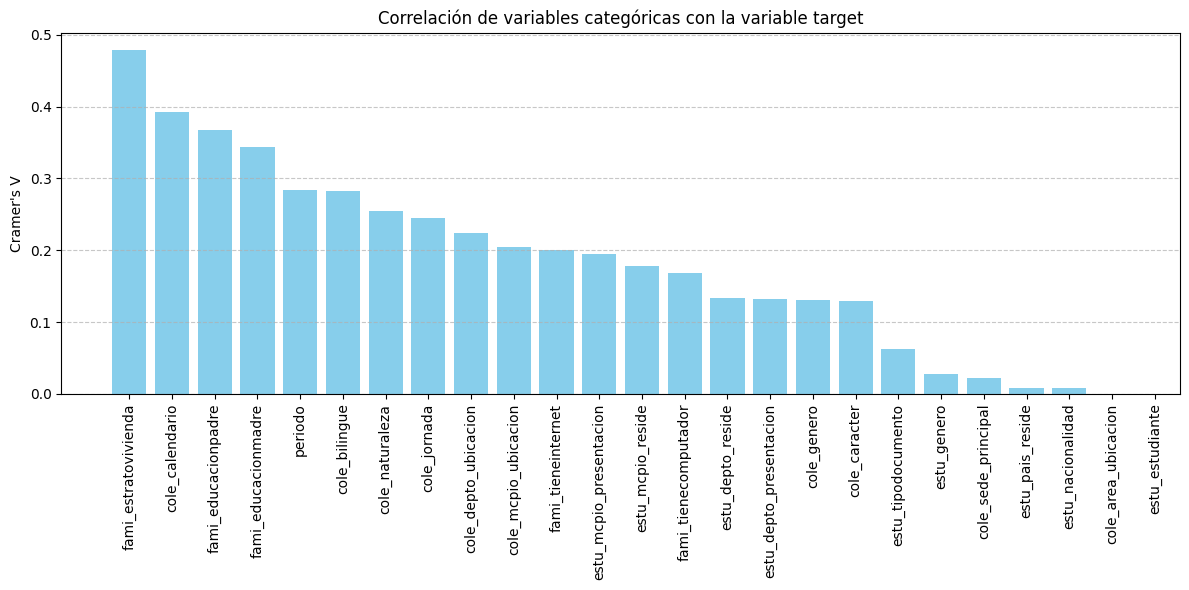

In [44]:
# Graficar
plt.figure(figsize=(12, 6))
plt.bar(corr_df.index, corr_df["Cramer's V"], color='skyblue')
plt.xticks(rotation=90)
plt.ylabel("Cramer's V")
plt.title("Correlación de variables categóricas con la variable target")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Se eliminan las variables con correlación de Cramer menor a 0.2

In [ ]:
for col in corr_df.index:
    if corr_df.loc[col, "Cramer's V"] < 0.2:
        df = df.drop(col, axis=1)


,periodo,cole_bilingue,cole_calendario,cole_depto_ubicacion,cole_jornada,cole_mcpio_ubicacion,cole_naturaleza,fami_educacionmadre,fami_educacionpadre,fami_estratovivienda,desemp_ingles,punt_ingles,resultado
0,2,N,A,CUNDINAMARCA,MAÑANA,FUSAGASUGÁ,OFICIAL,Primaria completa,Primaria completa,Estrato 2,A-,41.0,no_exitoso
1,2,N,A,CAUCA,MAÑANA,PATÍA,OFICIAL,Secundaria (Bachillerato) incompleta,Secundaria (Bachillerato) completa,Estrato 1,A1,47.0,no_exitoso
2,2,N,A,BOGOTA,MAÑANA,BOGOTÁ D.C.,OFICIAL,Secundaria (Bachillerato) completa,Educación profesional completa,Estrato 2,A-,36.0,no_exitoso
3,2,N,A,ANTIOQUIA,MAÑANA,VENECIA,OFICIAL,Secundaria (Bachillerato) incompleta,Ninguno,Estrato 2,A1,43.0,no_exitoso
4,2,N,A,VALLE,MAÑANA,CALIMA,OFICIAL,Primaria incompleta,Primaria incompleta,Estrato 2,A-,43.0,no_exitoso
...,...,...,...,...,...,...,...,...,...,...,...,...,...
494089,2,N,A,SANTANDER,MAÑANA,BARRANCABERMEJA,OFICIAL,Primaria incompleta,Primaria incompleta,Estrato 1,A-,34.0,no_exitoso
494090,2,N,A,NARIÑO,TARDE,PASTO,OFICIAL,Primaria incompleta,Primaria incompleta,Estrato 1,A1,45.0,no_exitoso
494091,2,N,A,VALLE,MAÑANA,CALI,NO OFICIAL,Secundaria (Bachillerato) completa,Secundaria (Bachillerato) completa,Estrato 2,A-,39.0,no_exitoso
494092,2,N,A,VALLE,MAÑANA,CANDELARIA,OFICIAL,Primaria completa,Ninguno,Estrato 2,A1,45.0,no_exitoso


Características que indican lo mismo que la variable de interés

In [49]:
df = df.drop(columns=['estu_privado_libertad', 'estu_estudiante'])

## 2. SHAP Values

In [46]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import shap
import keras

In [50]:
X = df.drop(columns=['resultado', 'desemp_ingles', 'punt_ingles'])
y = df.resultado

In [78]:
X.columns

Index(['periodo', 'cole_bilingue', 'cole_calendario', 'cole_depto_ubicacion',
       'cole_jornada', 'cole_mcpio_ubicacion', 'cole_naturaleza',
       'fami_educacionmadre', 'fami_educacionpadre', 'fami_estratovivienda'],
      dtype='object')

In [52]:
categorical_features = X.columns.tolist()

preprocessor = ColumnTransformer([
    ('cat', OneHotEncoder(sparse_output=False), categorical_features)
])

In [53]:
def create_model(input_dim):
    model = keras.models.Sequential([
        keras.layers.Dense(16, activation='relu', input_dim=input_dim),
        keras.layers.Dense(8, activation='relu'),
        keras.layers.Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

In [54]:
X_transformed = preprocessor.fit_transform(X)
input_dim = X_transformed.shape[1]

In [58]:
X_transformed.dtype

dtype('float64')

In [59]:
model = create_model(input_dim)
f_predict = lambda x: model.predict(x, verbose=0).flatten()

c:\Users\sofia\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [60]:
explainer = shap.KernelExplainer(f_predict, X_transformed[:100])
shap_values = explainer.shap_values(X_transformed[:10])

100%|██████████| 10/10 [03:11<00:00, 19.20s/it]


In [62]:
shap_values

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

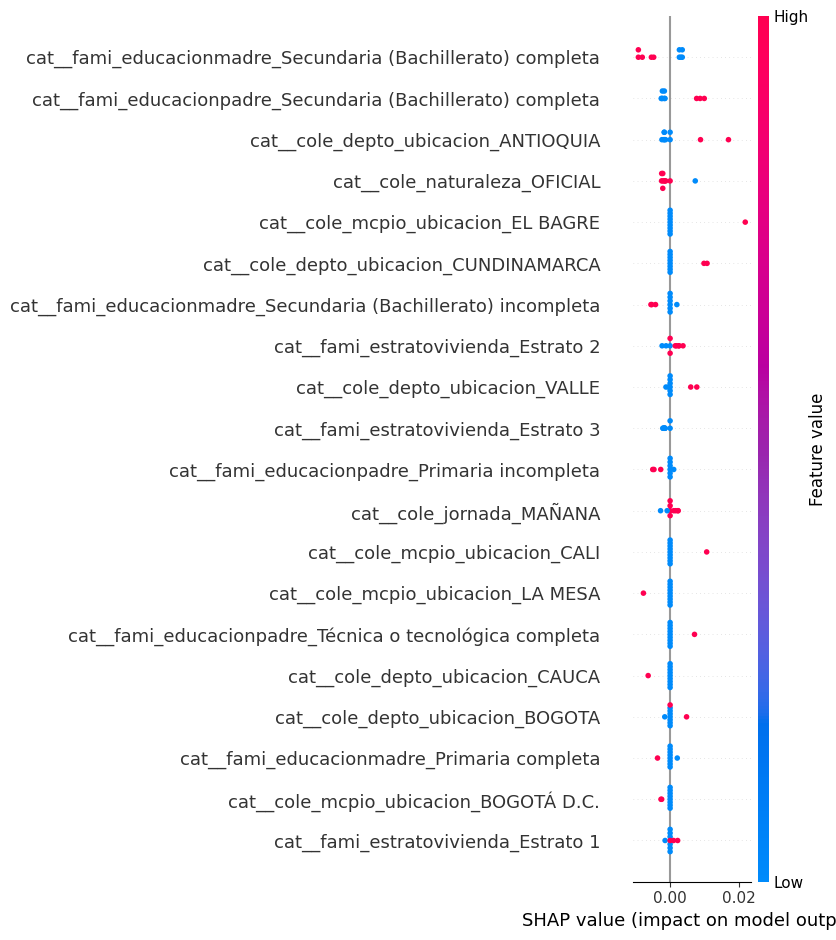

In [74]:
shap.summary_plot(shap_values, features=X_transformed[:10], feature_names=preprocessor.get_feature_names_out())

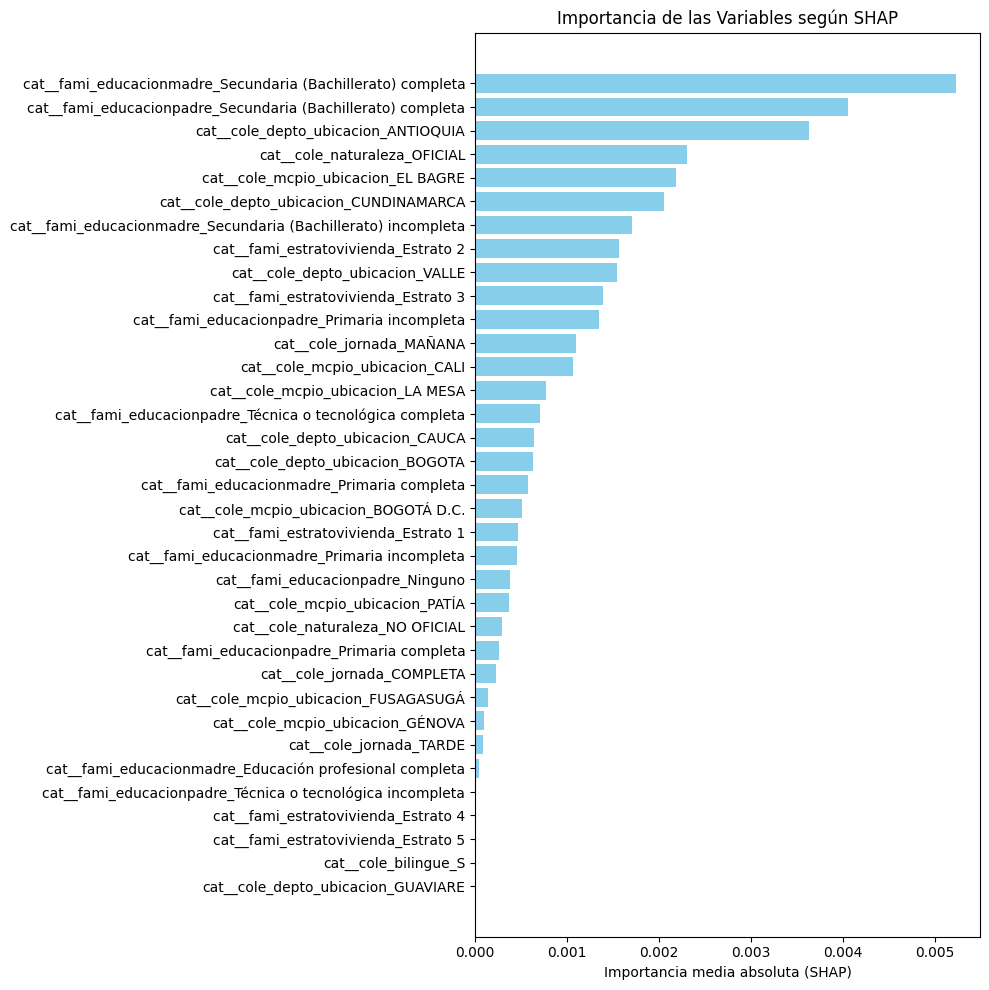

In [77]:
# Calcular la importancia media absoluta de cada variable
shap_abs_mean = np.abs(shap_values).mean(axis=0)

# Crear un DataFrame para ordenar las variables
shap_df = pd.DataFrame({
    'Variable': preprocessor.get_feature_names_out(),
    'SHAP Value (mean abs)': shap_abs_mean
}).sort_values(by='SHAP Value (mean abs)', ascending=False).head(35)

# Graficar
plt.figure(figsize=(10, 10))
plt.barh(shap_df['Variable'], shap_df['SHAP Value (mean abs)'], color='skyblue')
plt.xlabel('Importancia media absoluta (SHAP)')
plt.title('Importancia de las Variables según SHAP')
plt.gca().invert_yaxis()  # Invertir eje para que las más importantes queden arriba
plt.tight_layout()
plt.show()

## Resumen
1. Características Iniciales: 
        ["fami_estratovivienda", "cole_calendario", "fami_educacionpadre", "fami_educacionmadre", "periodo", "cole_bilingue", "cole_naturaleza", "cole_jornada", "cole_depto_ubicacion", "cole_mcpio_ubicacion", "fami_tieneinternet", "estu_mcpio_presentacion", "estu_mcpio_reside", "fami_tienecomputador", "estu_depto_reside", "estu_depto_presentacion", "cole_genero", "cole_caracter", "estu_tipodocumento", "estu_genero", "cole_sede_principal", "estu_pais_reside", "estu_nacionalidad"]

2. Características después de Depuración por Correlación de Cramer:
        ['periodo', 'cole_bilingue', 'cole_calendario', 'cole_depto_ubicacion', 'cole_jornada', 'cole_mcpio_ubicacion', 'cole_naturaleza', 'fami_educacionmadre', 'fami_educacionpadre', 'fami_estratovivienda']
3. Características Finales (con SHAP):
        ['cole_depto_ubicacion', 'cole_jornada', 'cole_mcpio_ubicacion', 'cole_naturaleza', 'fami_educacionmadre', 'fami_educacionpadre', 'fami_estratovivienda']